In [ ]:
import pandas as pd

# Importing the Data

df = pd.read_csv("Stroke_dataset.csv")

# Displaying few rows of the dataset

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# No. of rows and columns in the dataset

print("No. of rows in the dataset is",df.shape[0]," and No. of columns in the dataset is ", df.shape[1])

No. of rows in the dataset is 5110  and No. of columns in the dataset is  12


In [ ]:
# Duplicate rows in the dataset

duplicate_df = df.duplicated().sum()

print("No. of duplicate rows in the dataset is ",duplicate_df)

No. of duplicate rows in the dataset is  0


In [ ]:
# Missing Values in the dataset

missing_df = df.isnull().sum()

print("No. missing values in each column is\n", missing_df)

No. missing values in each column is
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
# Percentage of missing values

missing_percent = df.isnull().sum() / len(df)*100

print("Percentage of missing values in each column is\n", missing_percent)

Percentage of missing values in each column is
 id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


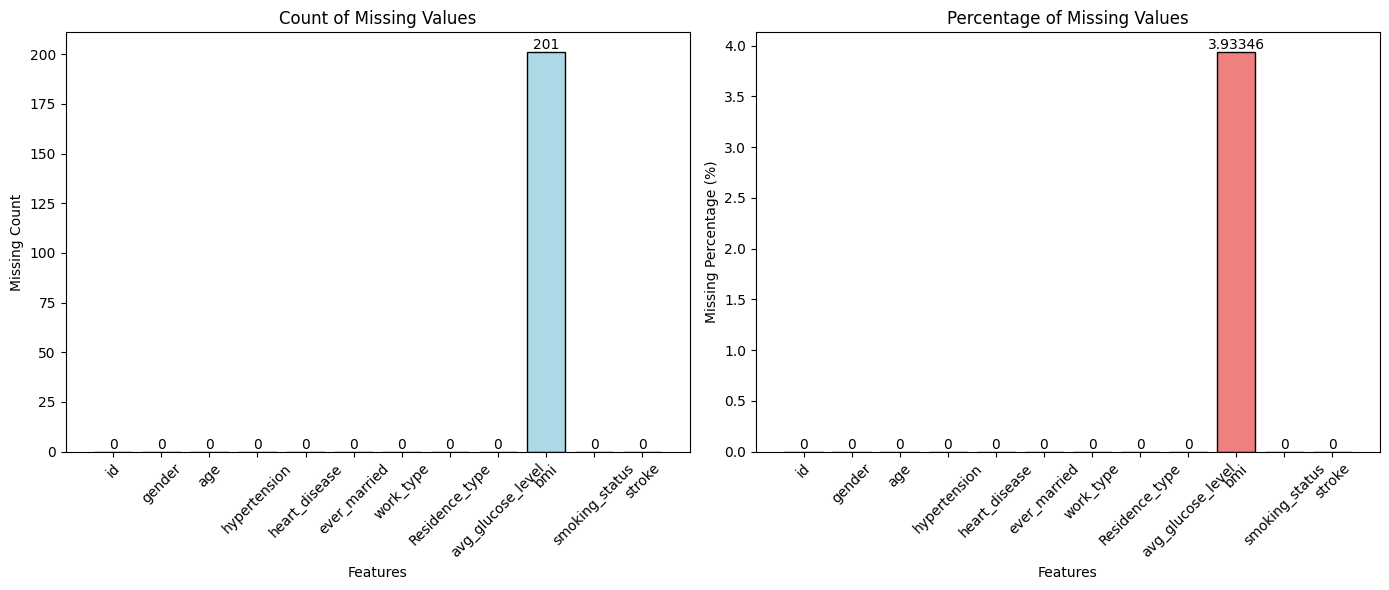

In [ ]:
# Visualizing missing columns

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Bar chart for missing count
axs[0].bar(missing_df.index, missing_df, color='lightblue', edgecolor ="black" )
axs[0].set_title('Count of Missing Values')
axs[0].set_xlabel('Features')
axs[0].set_ylabel('Missing Count')
axs[0].bar_label(axs[0].containers[0])
axs[0].tick_params(axis='x', rotation=45)

# Plot 2: Bar chart for percentage of missing values
axs[1].bar(missing_percent.index, missing_percent, color='lightcoral', edgecolor ="black")
axs[1].set_title('Percentage of Missing Values')
axs[1].set_xlabel('Features')
axs[1].set_ylabel('Missing Percentage (%)')
axs[1].bar_label(axs[1].containers[0])
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()




In [ ]:
# Dropping rows with null values

df = df.dropna()

df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [ ]:
# Data types of each column

df.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


In [ ]:
# Numerical statistics

df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# Unique values in the column with categorical data

Gender = df['gender'].unique()
print("Unique values in the Gender column are ", Gender)

Ever_married = df['ever_married'].unique()
print("Unique values in the Ever_married column are ", Ever_married)

Work_type = df['work_type'].unique()
print("Unique values in the Work_type column are ", Work_type)

Residence_type = df['Residence_type'].unique()
print("Unique values in the Residence_type column are ", Residence_type)

Smoking_status = df['smoking_status'].unique()
print("Unique values in the Smoking_status column are ", Smoking_status)

Unique values in the Gender column are  ['Male' 'Female' 'Other']
Unique values in the Ever_married column are  ['Yes' 'No']
Unique values in the Work_type column are  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique values in the Residence_type column are  ['Urban' 'Rural']
Unique values in the Smoking_status column are  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


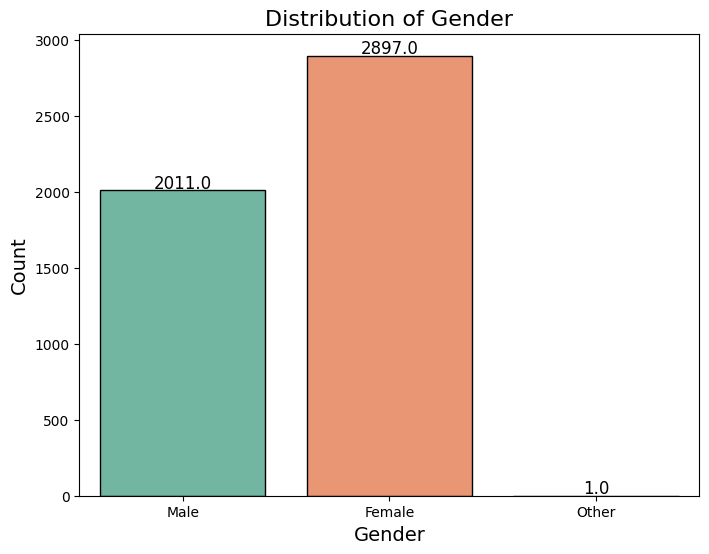

In [ ]:
# Frequency of catagorical feature Gender

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

ax = sns.countplot(x='gender', data=df, palette='Set2',hue='gender', edgecolor = 'black' )
plt.title('Distribution of Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')
plt.show()


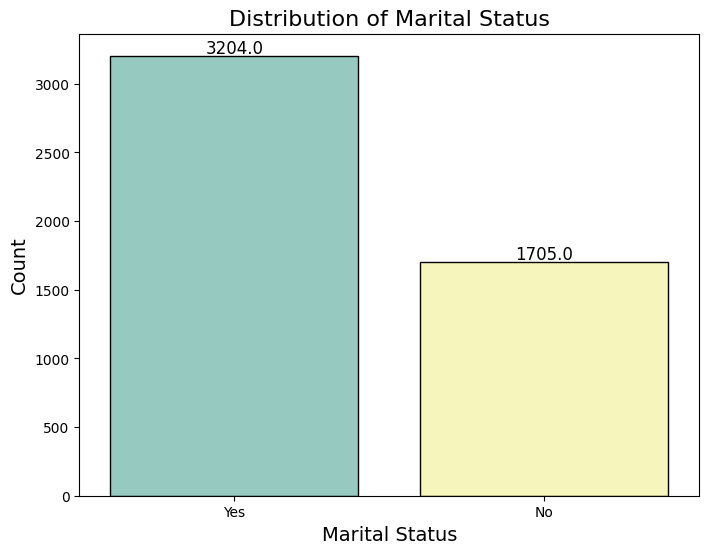

In [ ]:
# Frequency of Categorical Variable Ever Married

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

ax = sns.countplot(x='ever_married', data=df, palette='Set3',hue='ever_married', edgecolor = 'black' )
plt.title('Distribution of Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')
plt.show()

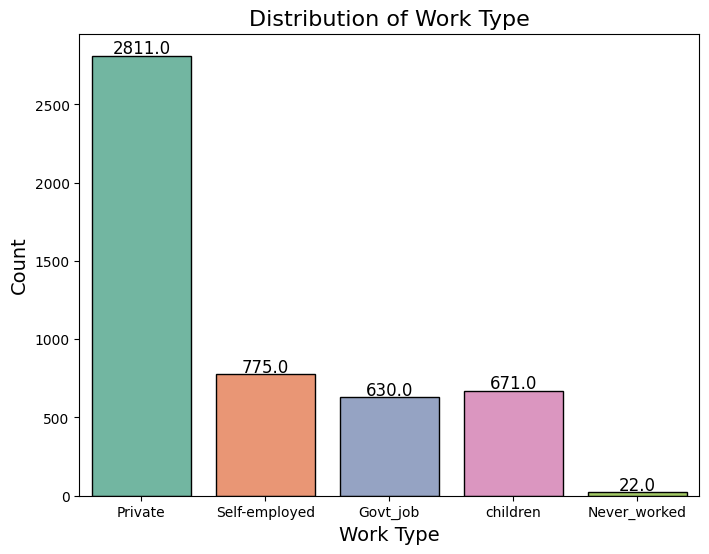

In [ ]:
# Frequency of Categorical Variable work type

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

ax = sns.countplot(x='work_type', data=df, palette='Set2',hue='work_type', edgecolor = 'black' )
plt.title('Distribution of Work Type', fontsize=16)
plt.xlabel('Work Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')
plt.show()

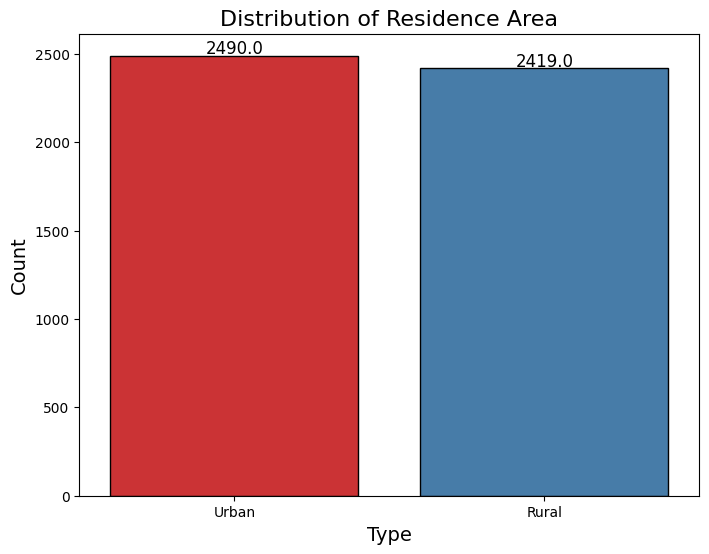

In [ ]:
# Frequency of categorical variable Residence type

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

ax = sns.countplot(x='Residence_type', data=df, palette='Set1',hue='Residence_type', edgecolor = 'black' )
plt.title('Distribution of Residence Area', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')
plt.show()

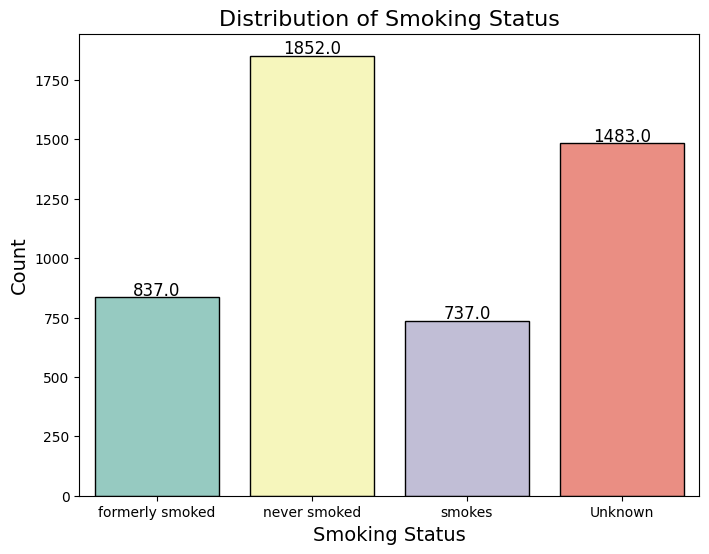

In [ ]:
# Frequency of categorical variable Smoking status

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

ax = sns.countplot(x='smoking_status', data=df, palette='Set3',hue='smoking_status', edgecolor = 'black' )
plt.title('Distribution of Smoking Status', fontsize=16)
plt.xlabel('Smoking Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')
plt.show()

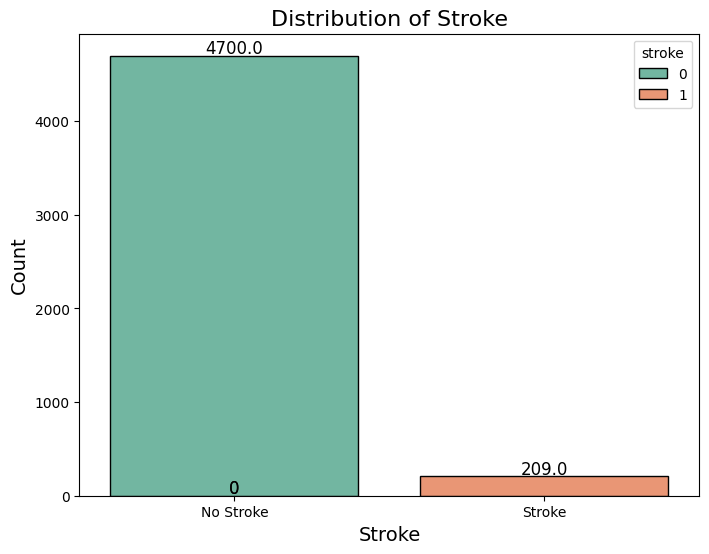

In [ ]:
# Distribution of the target variable Stroke

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

ax = sns.countplot(x='stroke', data=df, palette='Set2',hue='stroke', edgecolor = 'black' )
plt.title('Distribution of Stroke', fontsize=16)
plt
plt.xlabel('Stroke', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')
plt.show()

In [ ]:
# Chi Square test for the categorical variable gender and target variable Stroke

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['gender'], df['stroke'])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table)
print("\nChi-square statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected frequencies table:")
print(expected)

alpha = 0.05
if p_val < alpha:
    print("\nWe reject the null hypothesis: There is an association between gender and stroke.")
else:
    print("\nWe fail to reject the null hypothesis: There is no association between gender and stroke.")

Contingency Table:
stroke     0    1
gender           
Female  2777  120
Male    1922   89
Other      1    0

Chi-square statistic: 0.27843022275621393
p-value: 0.8700408526403285
Degrees of Freedom: 2
Expected frequencies table:
[[2.77366062e+03 1.23339377e+02]
 [1.92538195e+03 8.56180485e+01]
 [9.57425138e-01 4.25748625e-02]]

We fail to reject the null hypothesis: There is no association between gender and stroke.


In [ ]:
# Chi Square test for the categorical variable Marital status and target variable Stroke

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['ever_married'], df['stroke'])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table)
print("\nChi-square statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected frequencies table:")
print(expected)

alpha = 0.05
if p_val < alpha:
    print("\nWe reject the null hypothesis: There is an association between Marital status and stroke.")

else:
    print("\nWe fail to reject the null hypothesis: There is no association between Marital status and stroke.")


Contingency Table:
stroke           0    1
ever_married           
No            1682   23
Yes           3018  186

Chi-square statistic: 53.12593819801626
p-value: 3.1283412849388787e-13
Degrees of Freedom: 1
Expected frequencies table:
[[1632.40985944   72.59014056]
 [3067.59014056  136.40985944]]

We reject the null hypothesis: There is an association between Marital status and stroke.


In [ ]:
# Chi Square test for the categorical variable Work type and target variable Stroke

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['work_type'], df['stroke'])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table)
print("\nChi-square statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected frequencies table:")
print(expected)

alpha = 0.05
if p_val < alpha:
    print("\nWe reject the null hypothesis: There is an association between Work type and stroke.")

else:
    print("\nWe fail to reject the null hypothesis: There is no association between Work type and stroke.")


Contingency Table:
stroke            0    1
work_type               
Govt_job        602   28
Never_worked     22    0
Private        2684  127
Self-employed   722   53
children        670    1

Chi-square statistic: 41.95353832836521
p-value: 1.7055668658884947e-08
Degrees of Freedom: 4
Expected frequencies table:
[[6.03177837e+02 2.68221634e+01]
 [2.10633530e+01 9.36646975e-01]
 [2.69132206e+03 1.19677938e+02]
 [7.42004482e+02 3.29955184e+01]
 [6.42432267e+02 2.85677327e+01]]

We reject the null hypothesis: There is an association between Work type and stroke.


In [ ]:
# Chi Square test for the categorical variable residence type and target variable Stroke

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Residence_type'], df['stroke'])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table)
print("\nChi-square statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected frequencies table:")
print(expected)

alpha = 0.05
if p_val < alpha:
    print("\nWe reject the null hypothesis: There is an association between Residence type and stroke.")

else:
    print("\nWe fail to reject the null hypothesis: There is no association between Residence type and stroke.")


Contingency Table:
stroke             0    1
Residence_type           
Rural           2319  100
Urban           2381  109

Chi-square statistic: 0.12382469623434333
p-value: 0.7249227580411615
Degrees of Freedom: 1
Expected frequencies table:
[[2316.01140762  102.98859238]
 [2383.98859238  106.01140762]]

We fail to reject the null hypothesis: There is no association between Residence type and stroke.


In [ ]:
# Chi Square test for the categorical variable smoking status and target variable Stroke

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['smoking_status'], df['stroke'])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table)
print("\nChi-square statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected frequencies table:")
print(expected)

alpha = 0.05
if p_val < alpha:
    print("\nWe reject the null hypothesis: There is an association between Smoking status and stroke.")

else:
    print("\nWe fail to reject the null hypothesis: There is no association between Smoking status and stroke.")


Contingency Table:
stroke              0   1
smoking_status           
Unknown          1454  29
formerly smoked   780  57
never smoked     1768  84
smokes            698  39

Chi-square statistic: 34.9434924570628
p-value: 1.2522021032753853e-07
Degrees of Freedom: 3
Expected frequencies table:
[[1419.86147892   63.13852108]
 [ 801.36484009   35.63515991]
 [1773.15135465   78.84864535]
 [ 705.62232634   31.37767366]]

We reject the null hypothesis: There is an association between Smoking status and stroke.


                         id       age  hypertension  heart_disease  \
id                 1.000000  0.008984      0.001147       0.004016   
age                0.008984  1.000000      0.274425       0.257123   
hypertension       0.001147  0.274425      1.000000       0.115991   
heart_disease      0.004016  0.257123      0.115991       1.000000   
avg_glucose_level  0.006409  0.235838      0.180543       0.154525   
bmi                0.003084  0.333398      0.167811       0.041357   
stroke             0.004839  0.232331      0.142515       0.137938   

                   avg_glucose_level       bmi    stroke  
id                          0.006409  0.003084  0.004839  
age                         0.235838  0.333398  0.232331  
hypertension                0.180543  0.167811  0.142515  
heart_disease               0.154525  0.041357  0.137938  
avg_glucose_level           1.000000  0.175502  0.138936  
bmi                         0.175502  1.000000  0.042374  
stroke                    

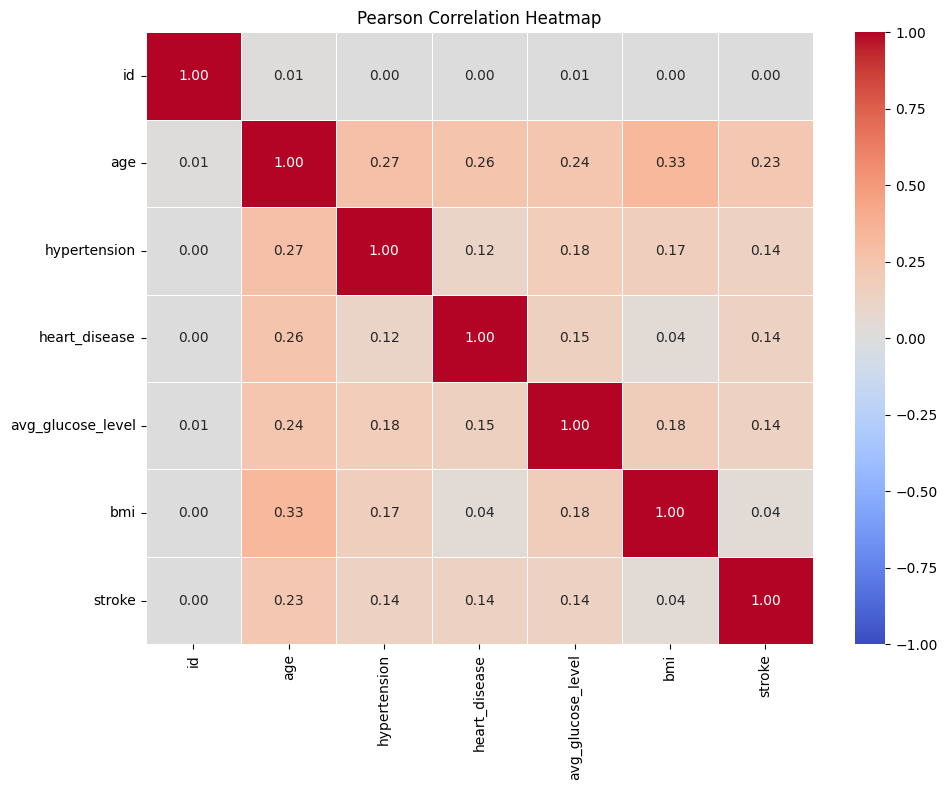

In [ ]:
# Pearson Correlation amoung the numerical features

# Correlation Matrix
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.tight_layout()  # Ensure everything fits within the plot
plt.show()

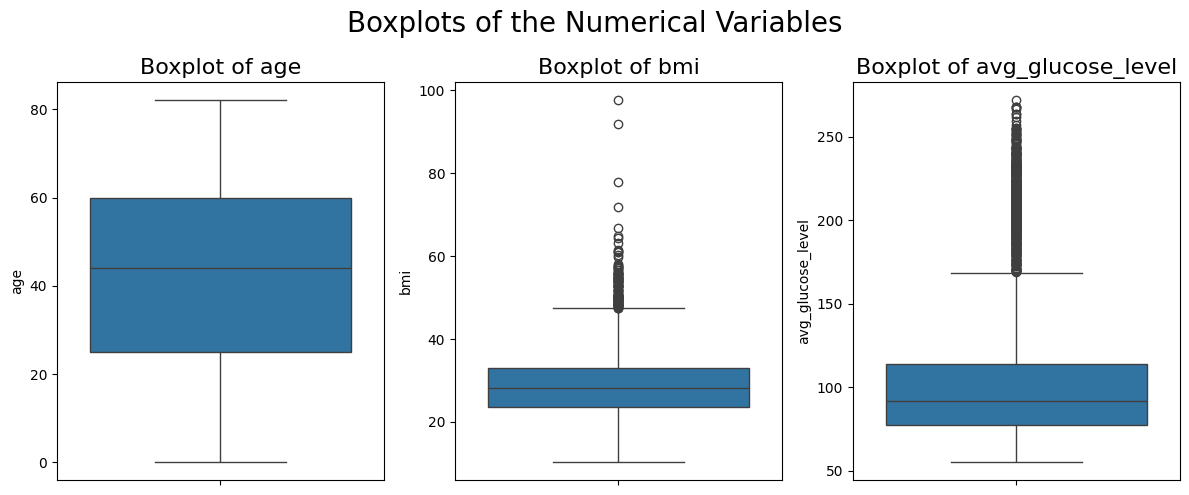

In [ ]:
# Outliers in the numerical features

import seaborn as sns
import matplotlib.pyplot as plt


num_features = ['age', 'bmi', 'avg_glucose_level']

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 5))

# Boxplot for 'age'
sns.boxplot(df[num_features[0]], ax=ax1)
ax1.set_title('Boxplot of ' + str(num_features[0]), fontsize=16 )

# Boxplot for 'bmi'
sns.boxplot(df[num_features[1]], ax=ax2)
ax2.set_title('Boxplot of ' + str(num_features[1]), fontsize=16)

# Boxplot for 'avg_glucose_level'
sns.boxplot(df[num_features[2]], ax=ax3)
ax3.set_title('Boxplot of ' + str(num_features[2]), fontsize=16)

plt.suptitle('Boxplots of the Numerical Variables', size=20)
plt.tight_layout()
plt.show()

<Figure size 2000x1500 with 0 Axes>

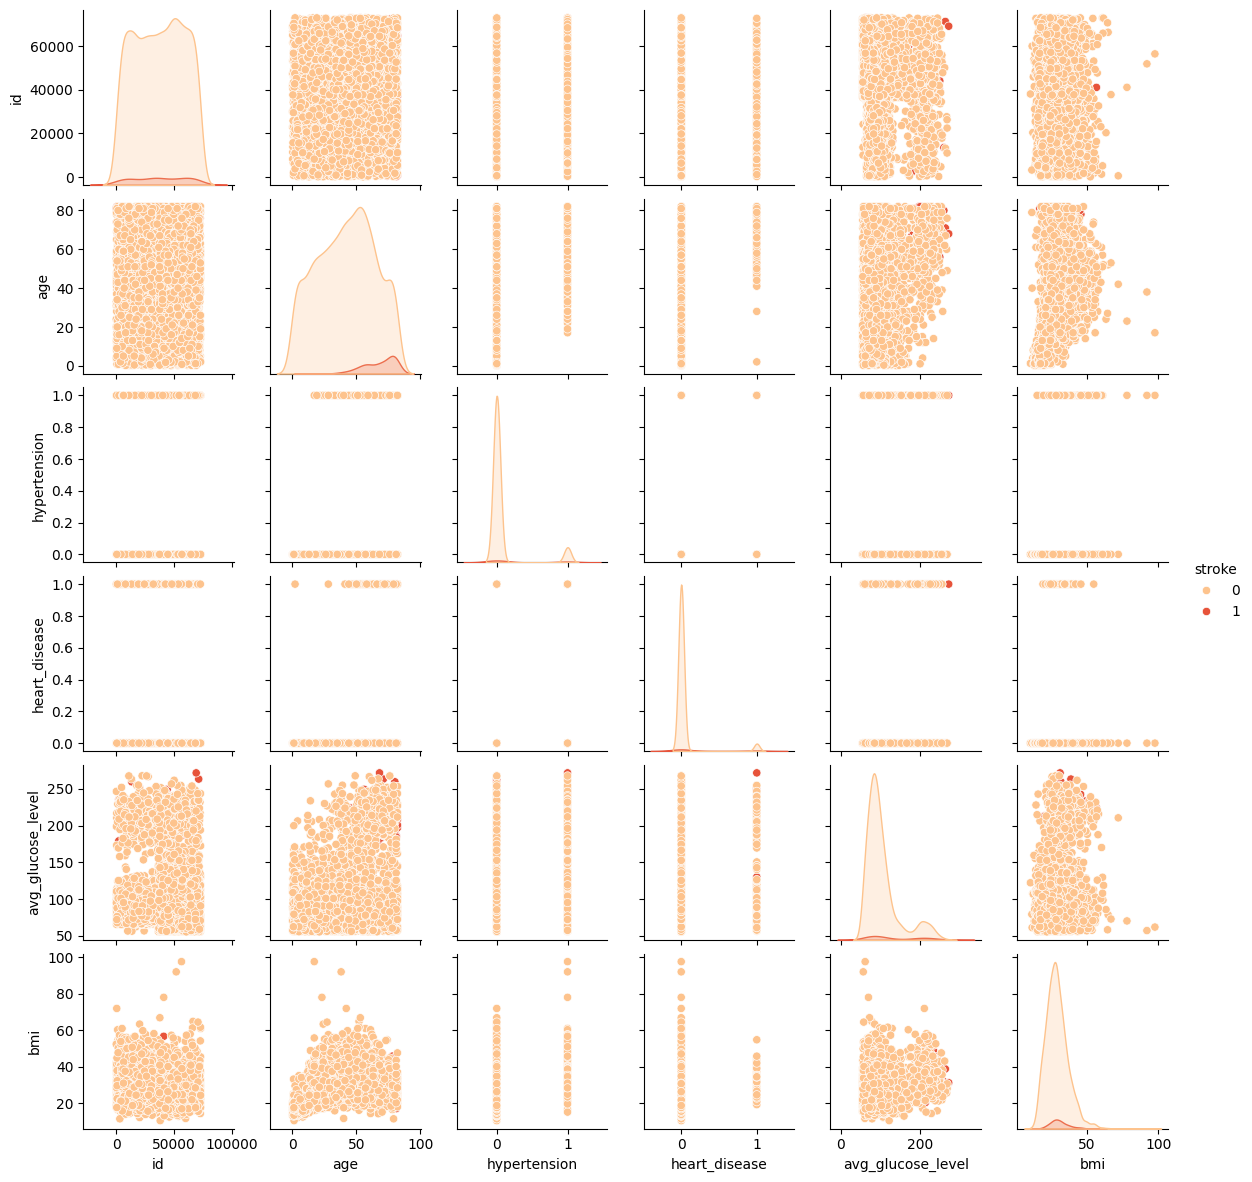

In [ ]:
# Scatter Plots and Pair Plots for analyzing relationships between variables

fig=plt.figure(figsize=(20,15),dpi=100)
sns.pairplot(data=df,hue='stroke',height=2,palette='OrRd')
plt.show()

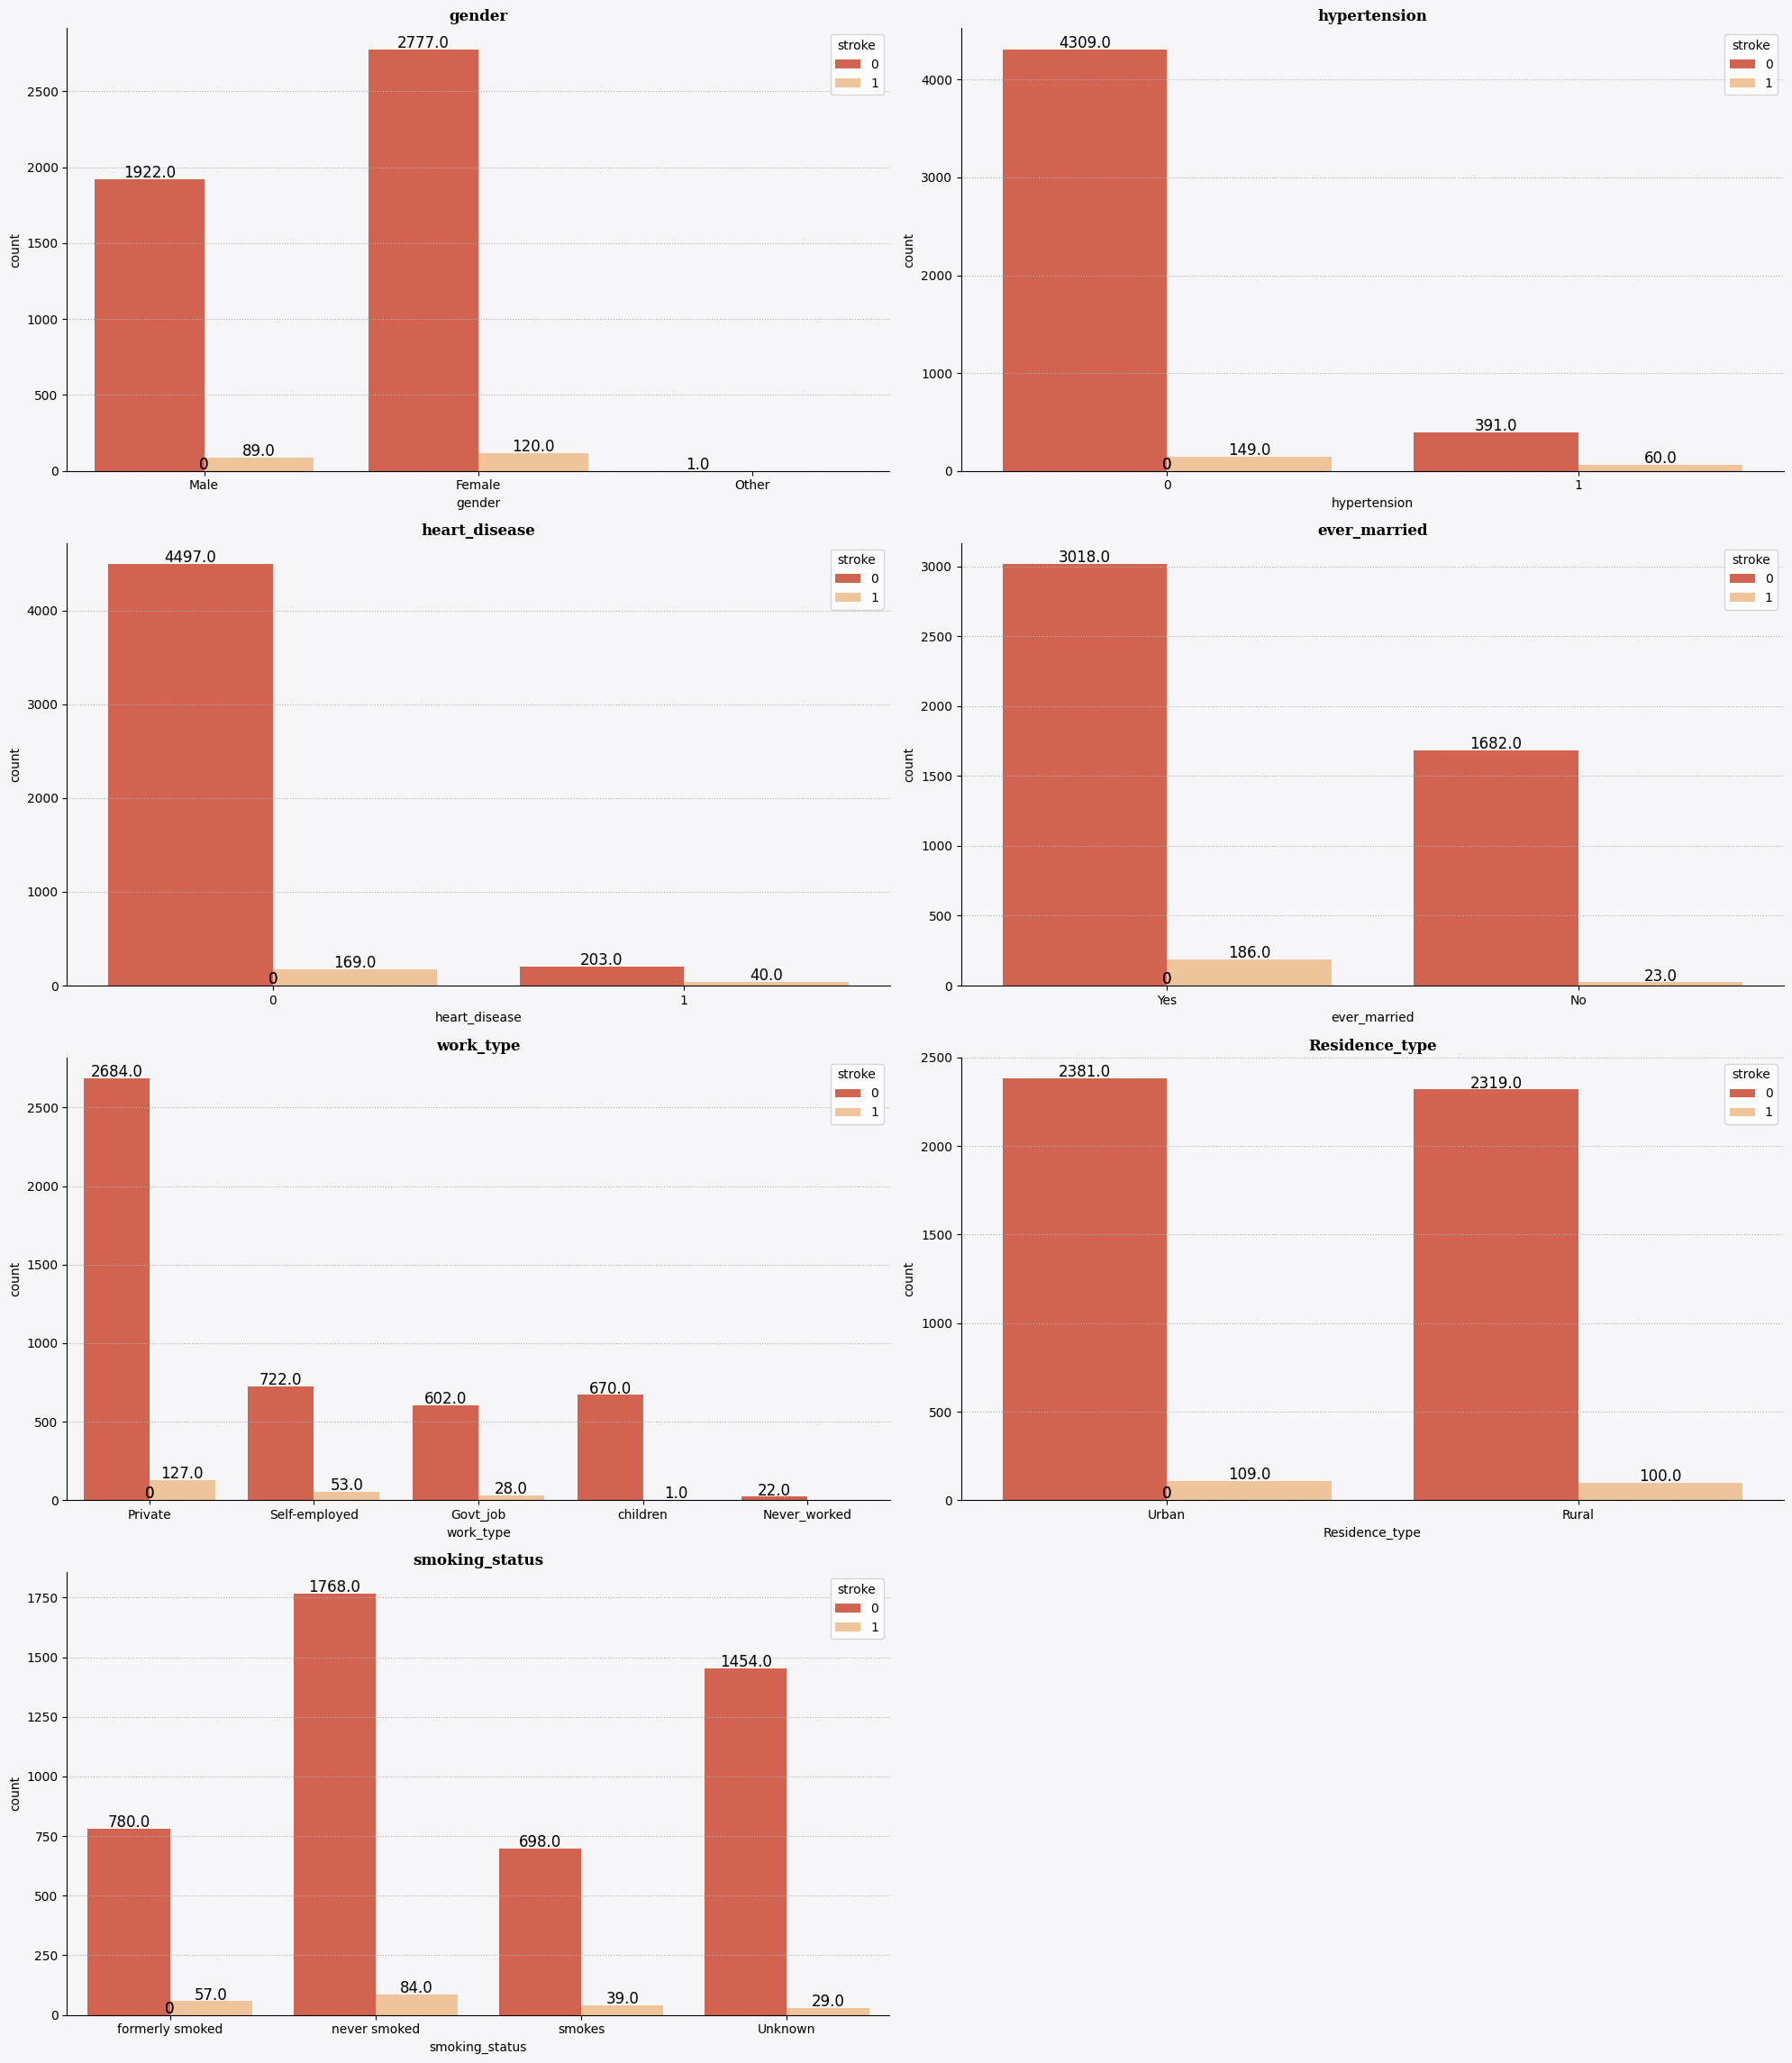

In [ ]:
# Analysing categorical variable with stroke

data_cat = df[['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]


fig = plt.figure(figsize=(20, 23))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color)


for indx, val in enumerate(data_cat.columns):
    ax = plt.subplot(4, 2, indx + 1)
    ax.set_facecolor(background_color)
    ax.set_title(val, fontweight='bold', fontfamily='serif')

    for i in ['top', 'right']:
        ax.spines[i].set_visible(False)

    ax.grid(linestyle=':', axis='y')


    count_plot = sns.countplot(x=data_cat[val], palette='OrRd_r', hue=df['stroke'], ax=ax)


    for p in count_plot.patches:
        count_plot.annotate(f'{p.get_height()}',
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center',
                            fontsize=12, color='black',
                            xytext=(0, 5),  # Slight vertical offset to place the label above
                            textcoords='offset points')

plt.tight_layout()
plt.show()

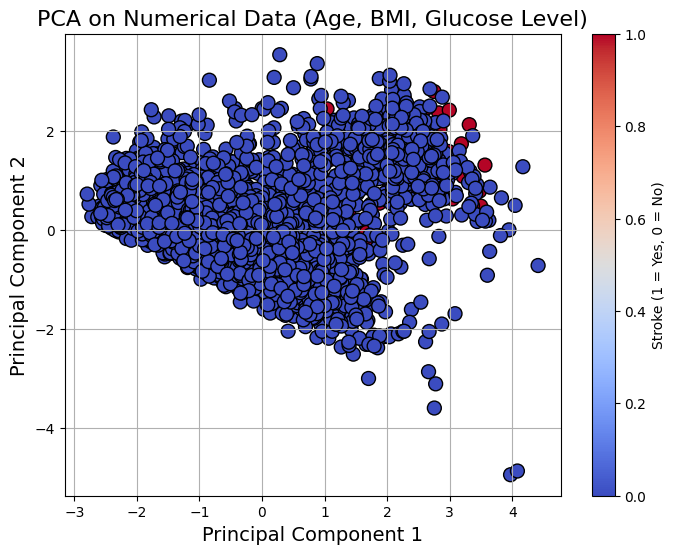

Explained Variance Ratio by each component: [0.5008308  0.27977091]


In [ ]:
# Applying PCA technique to the dataset

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numerical_data = df[['age', 'bmi', 'avg_glucose_level']]

# Standardizing data

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Applying PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['stroke'], cmap='coolwarm', edgecolors='k', s=100)
plt.title('PCA on Numerical Data (Age, BMI, Glucose Level)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.colorbar(label='Stroke (1 = Yes, 0 = No)')
plt.grid(True)
plt.show()


print(f"Explained Variance Ratio by each component: {pca.explained_variance_ratio_}")

In [1]:
# Importing Data

import pandas as pd
import numpy as np 

df = pd.read_csv(r'C:\Users\harish\OneDrive\Documents\IE7275\Project\Stroke_dataset.csv')
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
# Checking for duplicates

df.duplicated().sum()

0

In [3]:
# Checking for null values

df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
# Data description

df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
# Data types

df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
# Treating null values

df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df['smoking_status'] = df['smoking_status'].replace('Unknown', np.nan)
df['smoking_status'] = df['smoking_status'].fillna(df['smoking_status'].mode()[0])

In [7]:
# Dropping unwanted columns 

df.drop("id", axis=1, inplace=True)

In [8]:
# Label Encoding categorical features with 2 values

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

label_features = ['ever_married','Residence_type']
df[label_features] = df[label_features].apply(le.fit_transform)

In [9]:
# One hot encoding categorical features with more than 2 values

features = ['gender','work_type','smoking_status']
for cat in features:
    df[cat] = pd.Categorical(df[cat])
    df_dummies = pd.get_dummies(df[cat], prefix = cat + '_encoded',drop_first=True)
    df.drop(cat, axis=1, inplace=True)
    df = pd.concat([df, df_dummies], axis=1)


In [10]:
# Oversampling the dataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler  


# Splitting the data into features and target variable

train_x, test_x, train_y, test_y = train_test_split(
    df.drop('stroke', axis=1), 
    df['stroke'],               
    test_size=0.33,            
    random_state=42 )

# Normalization

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

# Check the distribution of classes before oversampling

print("Class distribution before oversampling:")
print(train_y.value_counts())

#  RandomOverSampler 

os = RandomOverSampler(sampling_strategy='auto')  
train_x, train_y = os.fit_resample(train_x, train_y)

# Check the distribution of classes after oversampling
print("Class distribution after oversampling:")
print(train_y.value_counts())

Class distribution before oversampling:
stroke
0    3270
1     153
Name: count, dtype: int64
Class distribution after oversampling:
stroke
0    3270
1    3270
Name: count, dtype: int64


Logistic Regression

Confusion matrix: 
 [[1180  411]
 [  23   73]] 

Accuracy Score: 0.74274 

ROC AUC Score: 0.75104 

F1: 0.84467 0.25172 



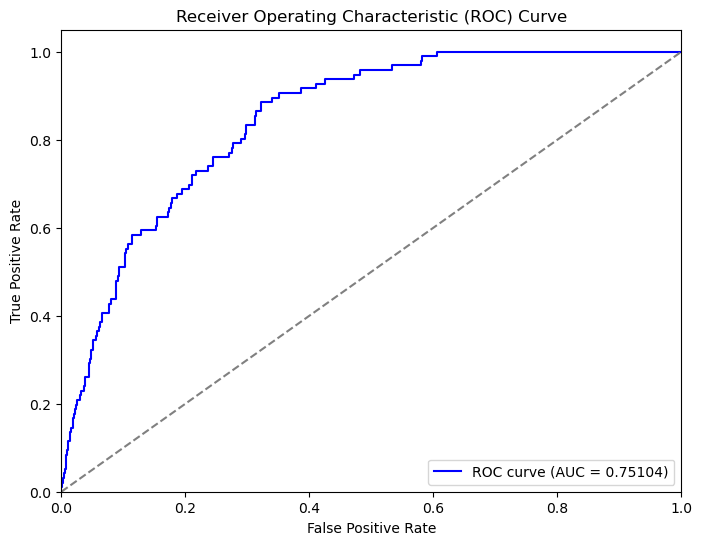

             Metric     Value
0          Accuracy  0.742739
1  Validation Error  0.257261
2       Sensitivity  0.760417
3       Specificity  0.741672
4          F1 Score  0.251724


In [11]:
# Logistic Regression model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, accuracy_score, roc_curve
import matplotlib.pyplot as plt

log = LogisticRegression(class_weight='balanced')
log.fit(train_x, train_y)

y_pred = log.predict(test_x)
y_pred_prob = log.predict_proba(test_x)[:, 1]

f1 = f1_score(test_y, y_pred,average=None)
roc = roc_auc_score(test_y, y_pred)
cm = confusion_matrix(test_y, y_pred) 
accu = accuracy_score(test_y, y_pred)

print('Logistic Regression\n')
print('Confusion matrix: \n',cm,'\n')
print('Accuracy Score: {:.5f} \n'.format(accu))
print('ROC AUC Score: {:.5f} \n'.format(roc))
print('F1: {:.5f} {:.5f} \n'.format(f1[0], f1[1]))

fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = {:.5f})'.format(roc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(test_y, y_pred)
TP = cm[1, 1]  
TN = cm[0, 0]  
FP = cm[0, 1]  
FN = cm[1, 0]  

accuracy = accuracy_score(test_y, y_pred)
validation_error = 1 - accuracy
sensitivity = TP / (TP + FN)  
specificity = TN / (TN + FP)  
f1 = f1_score(test_y, y_pred)

metrics = {
    'Accuracy': accuracy,
    'Validation Error': validation_error,
    'Sensitivity': sensitivity,
    'Specificity': specificity,
    'F1 Score': f1
}

metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

print(metrics_df)

Decision Tree Model

Confusion Matrix:
 [[1509   82]
 [  83   13]] 

Accuracy Score: 0.90219

ROC AUC Score: 0.54194

F1: 0.94816 0.13613 



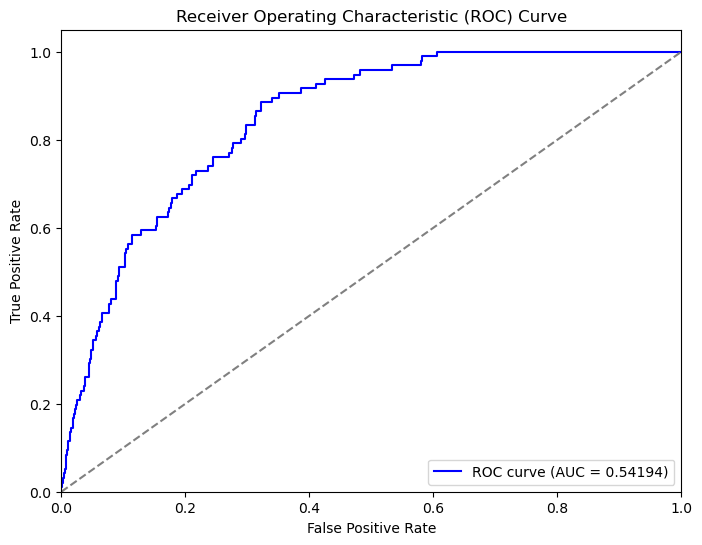

             Metric     Value
0          Accuracy  0.902193
1  Validation Error  0.097807
2       Sensitivity  0.135417
3       Specificity  0.948460
4          F1 Score  0.136126


In [12]:
# Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(train_x, train_y)
y_pred = dt_model.predict(test_x)
y_pred_prob = log.predict_proba(test_x)[:, 1]

f1 = f1_score(test_y, y_pred,average=None)
roc = roc_auc_score(test_y, y_pred)
cm = confusion_matrix(test_y, y_pred) 
accu = accuracy_score(test_y, y_pred)

print("Decision Tree Model\n")
print("Confusion Matrix:\n", cm, "\n")
print("Accuracy Score: {:.5f}\n".format(accu))
print("ROC AUC Score: {:.5f}\n".format(roc))
print('F1: {:.5f} {:.5f} \n'.format(f1[0], f1[1]))

fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = {:.5f})'.format(roc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(test_y, y_pred)
TP = cm[1, 1]  
TN = cm[0, 0]  
FP = cm[0, 1]  
FN = cm[1, 0]  

accuracy = accuracy_score(test_y, y_pred)
validation_error = 1 - accuracy
sensitivity = TP / (TP + FN)  
specificity = TN / (TN + FP)  
f1 = f1_score(test_y, y_pred)

metrics = {
    'Accuracy': accuracy,
    'Validation Error': validation_error,
    'Sensitivity': sensitivity,
    'Specificity': specificity,
    'F1 Score': f1
}

metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

print(metrics_df)

Random Forest

Confusion matrix: 
 [[1583    8]
 [  93    3]] 

Accuracy Score: 0.94013 

ROC AUC Score: 0.51311 

F1: 0.96908 0.05607 



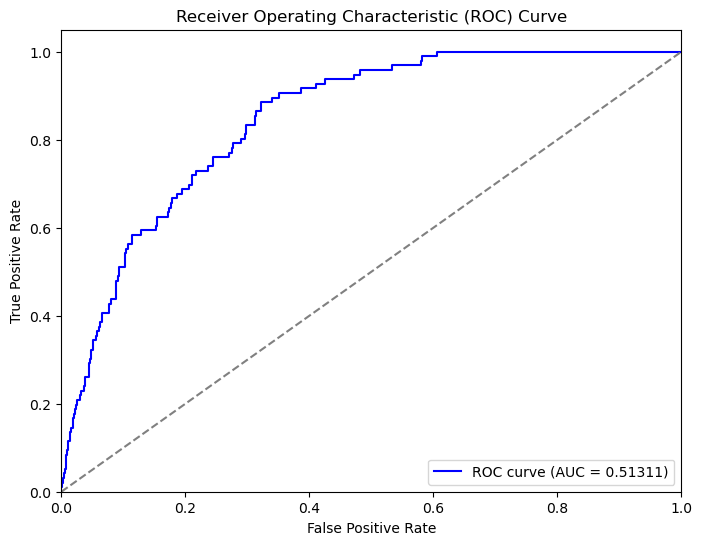

             Metric     Value
0          Accuracy  0.940130
1  Validation Error  0.059870
2       Sensitivity  0.031250
3       Specificity  0.994972
4          F1 Score  0.056075


In [13]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0,class_weight='balanced_subsample')
rfc.fit(train_x,train_y)

y_pred = rfc.predict(test_x)
y_pred_prob = log.predict_proba(test_x)[:, 1]

f1 = f1_score(test_y, y_pred,average=None)
roc = roc_auc_score(test_y, y_pred)
cm = confusion_matrix(test_y, y_pred) 
accu = accuracy_score(test_y, y_pred)
print('Random Forest\n')
print('Confusion matrix: \n',cm,'\n')
print('Accuracy Score: {:.5f} \n'.format(accu))
print('ROC AUC Score: {:.5f} \n'.format(roc))
print('F1: {:.5f} {:.5f} \n'.format(f1[0], f1[1]))

fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = {:.5f})'.format(roc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(test_y, y_pred)
TP = cm[1, 1]  
TN = cm[0, 0]  
FP = cm[0, 1]  
FN = cm[1, 0]  

accuracy = accuracy_score(test_y, y_pred)
validation_error = 1 - accuracy
sensitivity = TP / (TP + FN)  
specificity = TN / (TN + FP)  
f1 = f1_score(test_y, y_pred)

metrics = {
    'Accuracy': accuracy,
    'Validation Error': validation_error,
    'Sensitivity': sensitivity,
    'Specificity': specificity,
    'F1 Score': f1
}

metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

print(metrics_df)

XGB

Confusion matrix: 
 [[1542   49]
 [  81   15]] 

Accuracy Score: 0.92294 

ROC AUC Score: 0.56273 

F1: 0.95955 0.18750 



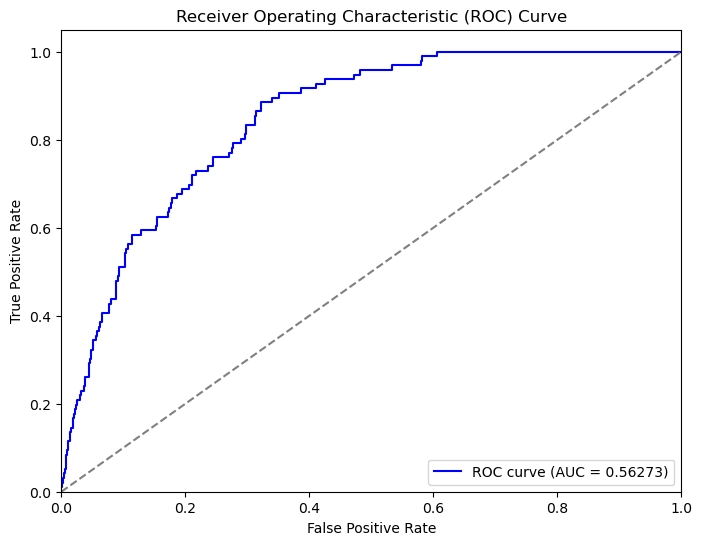

             Metric     Value
0          Accuracy  0.922940
1  Validation Error  0.077060
2       Sensitivity  0.156250
3       Specificity  0.969202
4          F1 Score  0.187500


In [14]:
# XG boost

from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='error')
xgb.fit(train_x,train_y)

y_pred = xgb.predict(test_x)
y_pred_prob = log.predict_proba(test_x)[:, 1]

f1 = f1_score(test_y, y_pred,average=None)
roc = roc_auc_score(test_y, y_pred)
cm = confusion_matrix(test_y, y_pred) 
accu = accuracy_score(test_y, y_pred)

print('XGB\n')
print('Confusion matrix: \n',cm,'\n')
print('Accuracy Score: {:.5f} \n'.format(accu))
print('ROC AUC Score: {:.5f} \n'.format(roc))
print('F1: {:.5f} {:.5f} \n'.format(f1[0], f1[1]))

fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = {:.5f})'.format(roc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(test_y, y_pred)
TP = cm[1, 1]  
TN = cm[0, 0]  
FP = cm[0, 1]  
FN = cm[1, 0]  

accuracy = accuracy_score(test_y, y_pred)
validation_error = 1 - accuracy
sensitivity = TP / (TP + FN)  
specificity = TN / (TN + FP)  
f1 = f1_score(test_y, y_pred)

metrics = {
    'Accuracy': accuracy,
    'Validation Error': validation_error,
    'Sensitivity': sensitivity,
    'Specificity': specificity,
    'F1 Score': f1
}

metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

print(metrics_df)

KNN Classifier

Confusion Matrix: 
 [[1423  168]
 [  68   28]] 

Accuracy Score: 0.86011 

ROC AUC Score: 0.59304 

F1: 0.92343 0.19178 



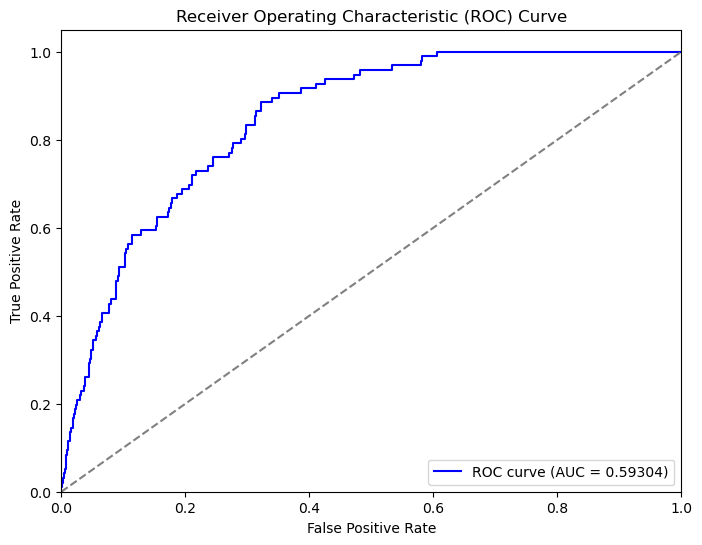

             Metric     Value
0          Accuracy  0.860107
1  Validation Error  0.139893
2       Sensitivity  0.291667
3       Specificity  0.894406
4          F1 Score  0.191781


In [15]:
# KNN Classifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(train_x, train_y)
y_pred = knn.predict(test_x)
y_pred_prob = log.predict_proba(test_x)[:, 1]

f1 = f1_score(test_y, y_pred, average=None)
roc = roc_auc_score(test_y, y_pred)
cm = confusion_matrix(test_y, y_pred)
accu = accuracy_score(test_y, y_pred)

print('KNN Classifier\n')
print('Confusion Matrix: \n', cm, '\n')
print('Accuracy Score: {:.5f} \n'.format(accu))
print('ROC AUC Score: {:.5f} \n'.format(roc))
print('F1: {:.5f} {:.5f} \n'.format(f1[0], f1[1]))

fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = {:.5f})'.format(roc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(test_y, y_pred)
TP = cm[1, 1]  
TN = cm[0, 0]  
FP = cm[0, 1]  
FN = cm[1, 0]  

accuracy = accuracy_score(test_y, y_pred)
validation_error = 1 - accuracy
sensitivity = TP / (TP + FN)  
specificity = TN / (TN + FP)  
f1 = f1_score(test_y, y_pred)

metrics = {
    'Accuracy': accuracy,
    'Validation Error': validation_error,
    'Sensitivity': sensitivity,
    'Specificity': specificity,
    'F1 Score': f1
}

metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

print(metrics_df)

SVC Classifier

Confusion Matrix: 
 [[1161  430]
 [  20   76]] 

Accuracy Score: 0.73325 

ROC AUC Score: 0.76070 

F1: 0.83766 0.25249 



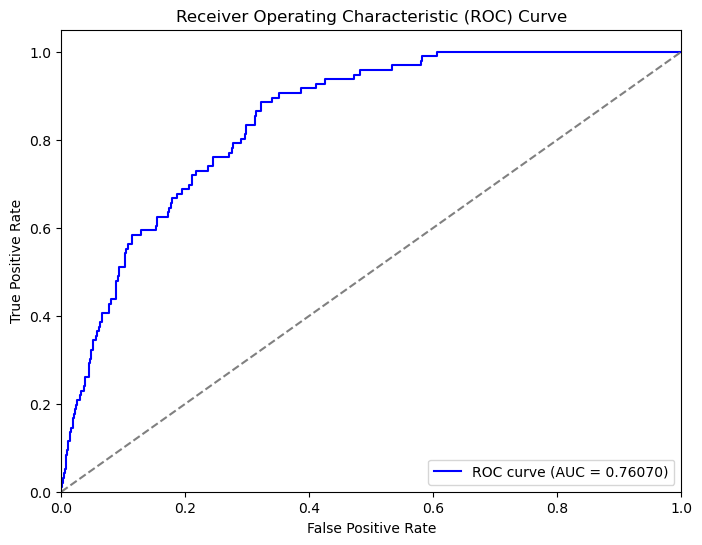

             Metric     Value
0          Accuracy  0.733254
1  Validation Error  0.266746
2       Sensitivity  0.791667
3       Specificity  0.729730
4          F1 Score  0.252492


In [16]:
# Support Vector Classifier

from sklearn.svm import SVC

svc = SVC(kernel='linear', random_state=0)  # You can also try 'rbf', 'poly', etc. for different kernels
svc.fit(train_x, train_y)
y_pred = svc.predict(test_x)
y_pred_prob = log.predict_proba(test_x)[:, 1]

f1 = f1_score(test_y, y_pred, average=None)
roc = roc_auc_score(test_y, y_pred)
cm = confusion_matrix(test_y, y_pred)
accu = accuracy_score(test_y, y_pred)

print('SVC Classifier\n')
print('Confusion Matrix: \n', cm, '\n')
print('Accuracy Score: {:.5f} \n'.format(accu))
print('ROC AUC Score: {:.5f} \n'.format(roc))
print('F1: {:.5f} {:.5f} \n'.format(f1[0], f1[1]))

fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = {:.5f})'.format(roc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(test_y, y_pred)
TP = cm[1, 1]  
TN = cm[0, 0]  
FP = cm[0, 1]  
FN = cm[1, 0]  

accuracy = accuracy_score(test_y, y_pred)
validation_error = 1 - accuracy
sensitivity = TP / (TP + FN)  
specificity = TN / (TN + FP)  
f1 = f1_score(test_y, y_pred)

metrics = {
    'Accuracy': accuracy,
    'Validation Error': validation_error,
    'Sensitivity': sensitivity,
    'Specificity': specificity,
    'F1 Score': f1
}

metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

print(metrics_df)

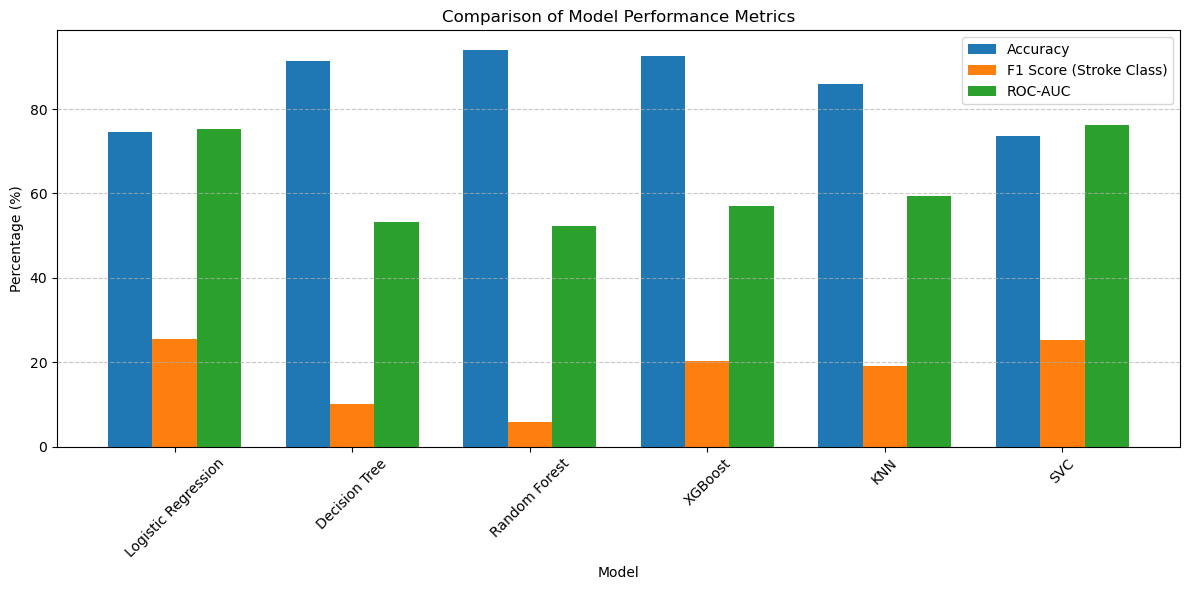

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the model performance dataset
data = {
    "Model": [
        "Logistic Regression", "Decision Tree", "Random Forest",
        "XGBoost", "KNN", "SVC"
    ],
    "Accuracy": [74.63, 91.35, 93.95, 92.59, 86.01, 73.50],
    "F1 Score (Stroke Class)": [25.44, 10.05, 5.93, 20.38, 19.18, 25.38],
    "ROC-AUC": [75.29, 53.32, 52.26, 56.92, 59.30, 76.16]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.25
x = range(len(df["Model"]))

plt.bar(x, df["Accuracy"], width=bar_width, label="Accuracy")
plt.bar([i + bar_width for i in x], df["F1 Score (Stroke Class)"], width=bar_width, label="F1 Score (Stroke Class)")
plt.bar([i + 2 * bar_width for i in x], df["ROC-AUC"], width=bar_width, label="ROC-AUC")

plt.xlabel("Model")
plt.ylabel("Percentage (%)")
plt.title("Comparison of Model Performance Metrics")
plt.xticks([i + bar_width for i in x], df["Model"], rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()